# **Preparations**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_dir = '/content/drive/MyDrive/Orange'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/valid'))

Contents of base directory:
['train', 'valid']

Contents of train directory:
['bad', 'good']

Contents of validation directory:
['good', 'bad']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with training pictures
train_bad_dir = os.path.join(train_dir, 'bad')
train_good_dir = os.path.join(train_dir, 'good')

# Directory with validation pictures
validation_bad_dir = os.path.join(validation_dir, 'bad')
validation_good_dir = os.path.join(validation_dir, 'good')

In [ ]:
train_bad_fnames = os.listdir(train_bad_dir)
train_good_fnames = os.listdir(train_good_dir)

print(train_bad_fnames[:10])
print(train_good_fnames[:10])

['IMG20200728185909.jpg', 'IMG20200728185909_01.jpg', 'IMG20200728185912.jpg', 'IMG20200728185913_01.jpg', 'IMG20200728185911_01.jpg', 'IMG20200728185913.jpg', 'IMG20200728185915.jpg', 'IMG20200728185910.jpg', 'IMG20200728185911.jpg', 'IMG20200728185915_01.jpg']
['IMG20200728161552.jpg', 'IMG20200728161550.jpg', 'IMG20200728161547.jpg', 'IMG20200728161548.jpg', 'IMG20200728161559.jpg', 'IMG20200728161605.jpg', 'IMG20200728161606.jpg', 'IMG20200728161617.jpg', 'IMG20200728161615.jpg', 'IMG20200728161628.jpg']


In [ ]:
print('total training `bad` images:', len(os.listdir(train_bad_dir)))
print('total training `good` images:', len(os.listdir(train_good_dir)))

print('total validation `bad` images:', len(os.listdir(validation_bad_dir)))
print('total validation `good` images:', len(os.listdir(validation_good_dir)))

total training `bad` images: 851
total training `good` images: 821
total validation `bad` images: 125
total validation `good` images: 114


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

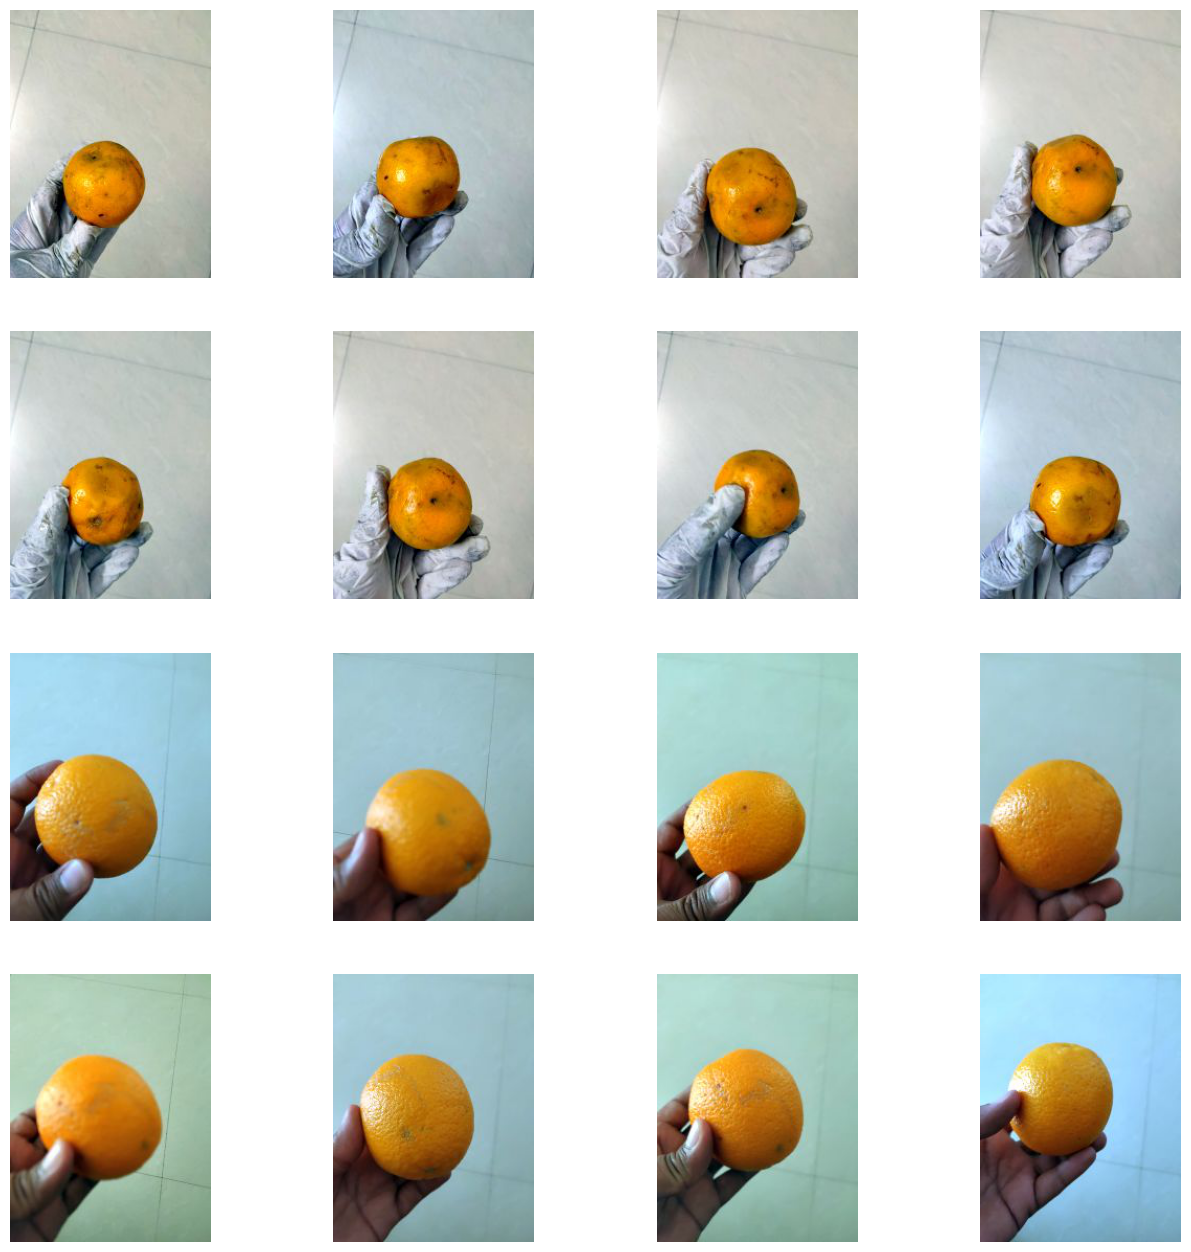

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_bad_pix = [os.path.join(train_bad_dir, fname) 
                for fname in train_bad_fnames[pic_index-8 : pic_index] 
               ]

next_good_pix = [os.path.join(train_good_dir, fname) 
                for fname in train_good_fnames[ pic_index-8 : pic_index]
               ]

for i, img_path in enumerate(next_bad_pix + next_good_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
from google.colab import files

# **Self-Created Model Arch with Non-Augmented Data & No Callback(s)**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
    )

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Self-Created Model Arch with Non-Augmented Data & No Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Self-Created Model Arch with Non-Augmented Data & No Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Self-Created Model Arch with Augmented Data & Callback(s)**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/self_created'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Self-Created Model Arch with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Self-Created Model Arch with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **Transfer Learning (Xception) with Augmented Data & Callback(s)**

In [ ]:
from tensorflow.keras.applications import Xception

In [ ]:
model = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(2, activation='softmax') 
])

model.layers[0].trainable = False

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,386,538
Trainable params: 525,058
Non-trainable params: 20,861,480
______________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 1672 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/xception'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.3456 - accuracy: 0.8804
Epoch 1: val_accuracy improved from -inf to 0.92887, saving model to /content/checkpoint/xception
53/53 [==============================] - 548s 10s/step - loss: 0.3456 - accuracy: 0.8804 - val_loss: 0.1781 - val_accuracy: 0.9289 - lr: 0.0010
Epoch 2/50
53/53 [==============================] - ETA: 0s - loss: 0.2455 - accuracy: 0.9181
Epoch 2: val_accuracy did not improve from 0.92887
53/53 [==============================] - 28s 523ms/step - loss: 0.2455 - accuracy: 0.9181 - val_loss: 0.1491 - val_accuracy: 0.9247 - lr: 0.0010
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9366
Epoch 3: val_accuracy did not improve from 0.92887
53/53 [==============================] - 27s 510ms/step - loss: 0.1538 - accuracy: 0.9366 - val_loss: 0.1553 - val_accuracy: 0.9289 - lr: 0.0010
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.1819 - accurac

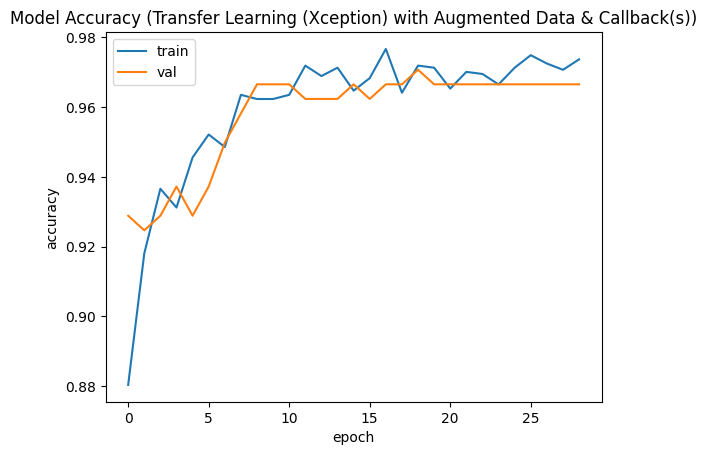

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (Xception) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

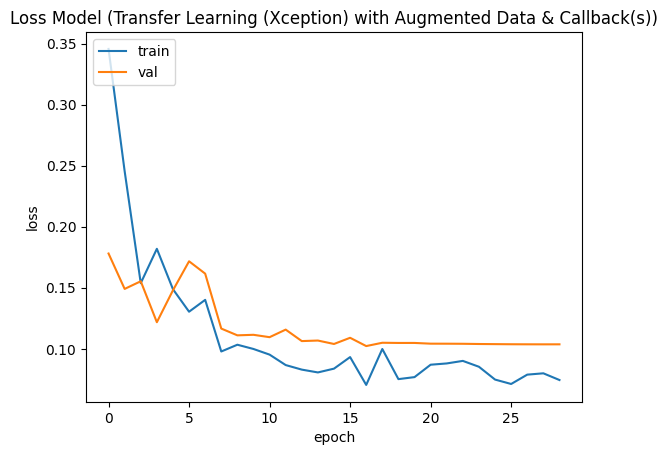

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (Xception) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!zip -r /content/orange_xception.zip /content/checkpoint/xception

  adding: content/checkpoint/xception/ (stored 0%)
  adding: content/checkpoint/xception/variables/ (stored 0%)
  adding: content/checkpoint/xception/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/checkpoint/xception/variables/variables.index (deflated 76%)
  adding: content/checkpoint/xception/assets/ (stored 0%)
  adding: content/checkpoint/xception/fingerprint.pb (stored 0%)
  adding: content/checkpoint/xception/saved_model.pb (deflated 92%)
  adding: content/checkpoint/xception/keras_metadata.pb (deflated 96%)


In [ ]:
files.download("/content/orange_xception.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Transfer Learning (MobileNetV2) with Augmented Data & Callback(s)**

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
model = tf.keras.models.Sequential([
    # MobileNetV2 Layer
    MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(2, activation='softmax') 
])

model.layers[0].trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 2,586,434
Trainable params: 328,450
Non-

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 1672 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/mobilenetv2'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.8791 - accuracy: 0.8529
Epoch 1: val_accuracy improved from -inf to 0.94561, saving model to /content/checkpoint/mobilenetv2
53/53 [==============================] - 54s 945ms/step - loss: 0.8791 - accuracy: 0.8529 - val_loss: 0.1758 - val_accuracy: 0.9456 - lr: 0.0010
Epoch 2/50
53/53 [==============================] - ETA: 0s - loss: 0.2047 - accuracy: 0.9228
Epoch 2: val_accuracy improved from 0.94561 to 0.95397, saving model to /content/checkpoint/mobilenetv2
53/53 [==============================] - 50s 948ms/step - loss: 0.2047 - accuracy: 0.9228 - val_loss: 0.1007 - val_accuracy: 0.9540 - lr: 0.0010
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.1992 - accuracy: 0.9324
Epoch 3: val_accuracy did not improve from 0.95397
53/53 [==============================] - 26s 492ms/step - loss: 0.1992 - accuracy: 0.9324 - val_loss: 0.1502 - val_accuracy: 0.9372 - lr: 0.0010
Epoch 4/50
53/53 [=========

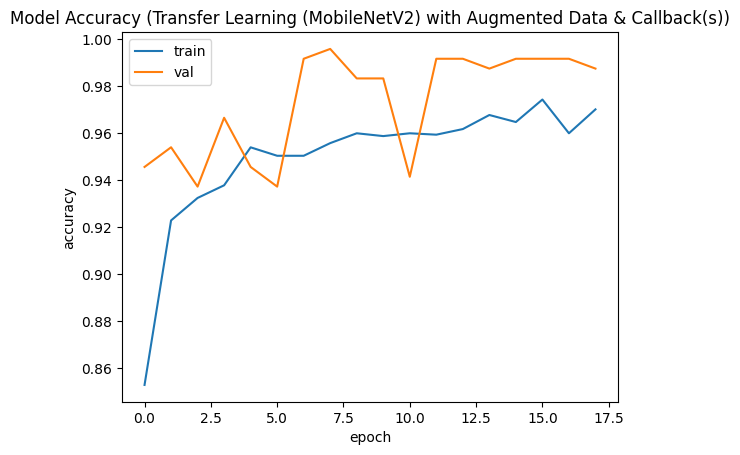

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (MobileNetV2) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

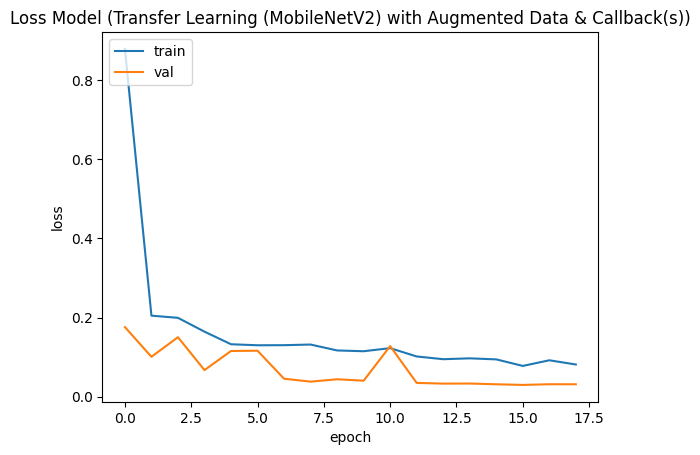

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (MobileNetV2) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!zip -r /content/orange_mobilenetv2.zip /content/checkpoint/mobilenetv2

  adding: content/checkpoint/mobilenetv2/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/variables/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/checkpoint/mobilenetv2/variables/variables.index (deflated 76%)
  adding: content/checkpoint/mobilenetv2/assets/ (stored 0%)
  adding: content/checkpoint/mobilenetv2/fingerprint.pb (stored 0%)
  adding: content/checkpoint/mobilenetv2/saved_model.pb (deflated 91%)
  adding: content/checkpoint/mobilenetv2/keras_metadata.pb (deflated 96%)


In [ ]:
files.download("/content/orange_mobilenetv2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Transfer Learning (Densenet121) with Augmented Data & Callback(s)**

In [ ]:
from tensorflow.keras.applications import DenseNet121

In [ ]:
model = tf.keras.models.Sequential([
    # DenseNet121 Layer
    DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(2, activation='softmax') 
])

model.layers[0].trainable = False

29084464/29084464 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_max_pooling2d_2 (Glo  (None, 1024)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 7,300,418
Trainable params: 262,914
Non-trainable params: 7,037,504
______________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=80,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(224, 224))

Found 1672 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [ ]:
# Defining Callbacks

# Save the best model
file_path = '/content/checkpoint/densenet121'
checkpoint_callback = ModelCheckpoint(filepath=file_path, save_best_only=True, monitor='val_accuracy', verbose=2)

# Early stopping
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=2, min_lr=1e-6)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
    )

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 1.0812 - accuracy: 0.8122
Epoch 1: val_accuracy improved from -inf to 0.92887, saving model to /content/checkpoint/densenet121
53/53 [==============================] - 98s 2s/step - loss: 1.0812 - accuracy: 0.8122 - val_loss: 0.2203 - val_accuracy: 0.9289 - lr: 0.0010
Epoch 2/50
53/53 [==============================] - ETA: 0s - loss: 0.2618 - accuracy: 0.9127
Epoch 2: val_accuracy did not improve from 0.92887
53/53 [==============================] - 27s 499ms/step - loss: 0.2618 - accuracy: 0.9127 - val_loss: 0.2161 - val_accuracy: 0.9121 - lr: 0.0010
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.2102 - accuracy: 0.9270
Epoch 3: val_accuracy improved from 0.92887 to 0.95397, saving model to /content/checkpoint/densenet121
53/53 [==============================] - 78s 1s/step - loss: 0.2102 - accuracy: 0.9270 - val_loss: 0.1531 - val_accuracy: 0.9540 - lr: 0.0010
Epoch 4/50
53/53 [===============

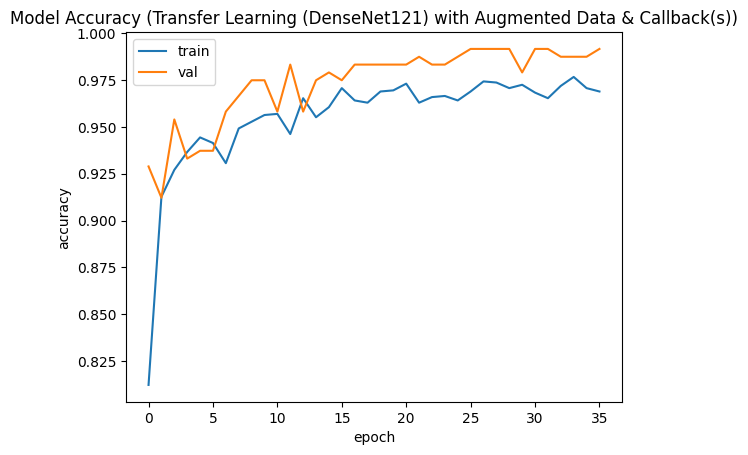

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Transfer Learning (DenseNet121) with Augmented Data & Callback(s))')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

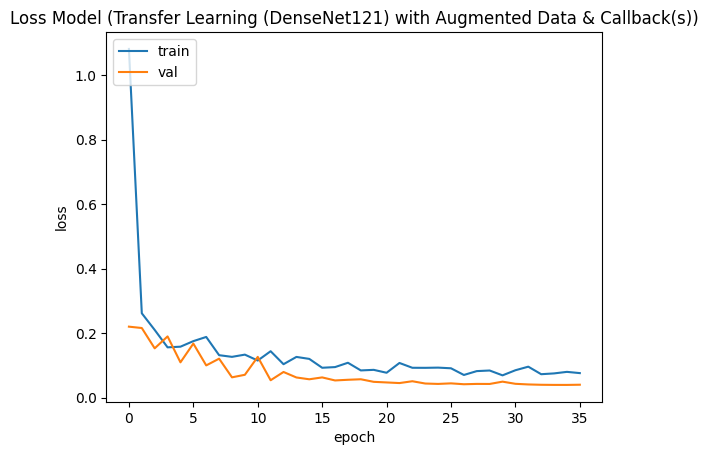

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model (Transfer Learning (DenseNet121) with Augmented Data & Callback(s))')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
!zip -r /content/orange_densenet121.zip /content/checkpoint/densenet121

  adding: content/checkpoint/densenet121/ (stored 0%)
  adding: content/checkpoint/densenet121/variables/ (stored 0%)
  adding: content/checkpoint/densenet121/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/checkpoint/densenet121/variables/variables.index (deflated 78%)
  adding: content/checkpoint/densenet121/assets/ (stored 0%)
  adding: content/checkpoint/densenet121/fingerprint.pb (stored 0%)
  adding: content/checkpoint/densenet121/saved_model.pb (deflated 92%)
  adding: content/checkpoint/densenet121/keras_metadata.pb (deflated 96%)


In [ ]:
files.download("/content/orange_densenet121.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>